In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.shape

(159973, 8)

In [6]:
books.describe()

,Year-Of-Publication
count,159972.000000
mean,1959.554247
std,260.524324
min,0.000000
25%,1990.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    1
Publisher              3
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [8]:
cols = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']

books[cols] = books[cols].replace(r'^http://', 'https://', regex=True)

In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.shape

(278858, 3)

In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings.shape

(1149780, 3)

In [13]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    1
Publisher              3
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
users.fillna({'Age': users['Age'].mean()},inplace=True)

In [16]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [17]:
print(books.duplicated().sum())

0


In [18]:
print(users.duplicated().sum())

0


In [19]:
print(ratings.duplicated().sum())

0


df['col'].value_counts()
df.groupby('col').size()

In [20]:
books['Book-Author'].value_counts()

top_10_book_authors= books['Book-Author'].value_counts().sort_values(ascending=False).head(10)
print(top_10_book_authors)

Book-Author
Agatha Christie        435
Stephen King           402
William Shakespeare    341
Ann M. Martin          307
Carolyn Keene          276
Francine Pascal        237
Nora Roberts           225
Isaac Asimov           219
R. L. Stine            218
Charles Dickens        194
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt

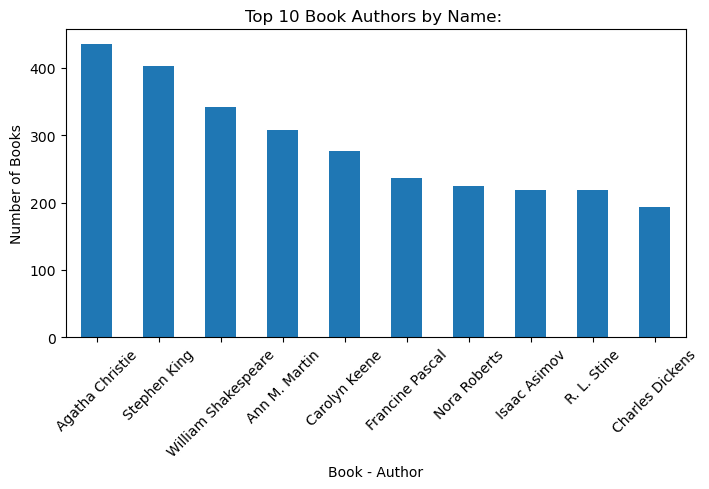

In [22]:
plt.figure(figsize=(8,4))
top_10_book_authors.plot(kind='bar')
plt.title("Top 10 Book Authors by Name: ")
plt.xlabel('Book - Author')
plt.ylabel('Number of Books') 
plt.xticks(rotation=45)
plt.show()

In [23]:
%pip install seaborn
import seaborn as sns

In [24]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


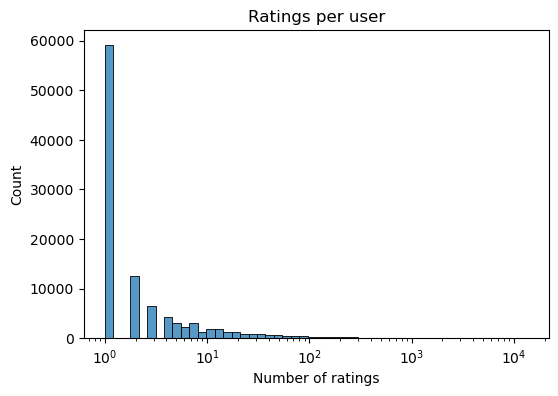

In [25]:
ratings_per_user = ratings.groupby('User-ID').size()
plt.figure(figsize=(6,4))
sns.histplot(ratings_per_user,bins=50,log_scale=True)
plt.title("Ratings per user")
plt.xlabel("Number of ratings")
plt.show()

What This Plot Reveals

Right-skewed distribution

Many users → few ratings

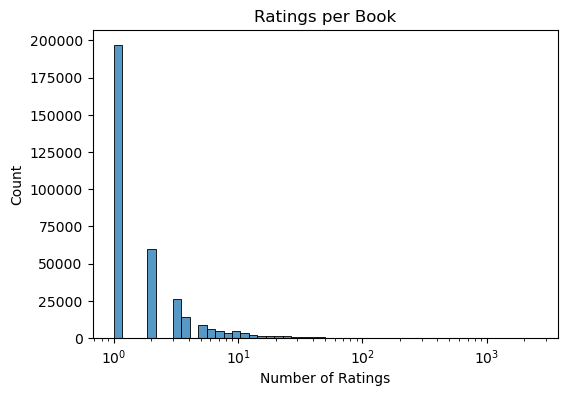

In [26]:
ratings_per_book = ratings.groupby('ISBN').size()

plt.figure(figsize=(6,4))
sns.histplot(ratings_per_book, bins=50, log_scale=True)
plt.title("Ratings per Book")
plt.xlabel("Number of Ratings")
plt.show()

In [27]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

This shows that Ratings are on a scale of 1-10

In [28]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [29]:
user_counts = ratings['User-ID'].value_counts()
item_counts = ratings['ISBN'].value_counts()

In [30]:
print(user_counts)

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64


In [31]:
print(item_counts)

ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64


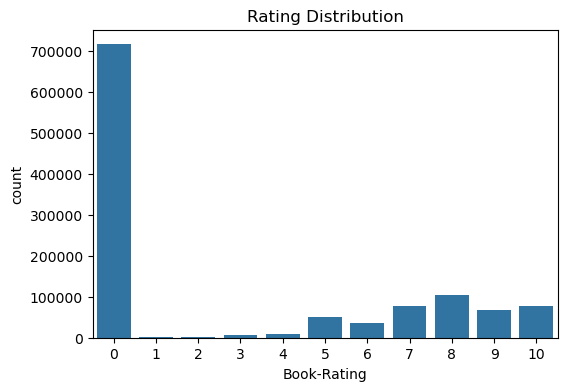

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Book-Rating', data=ratings)
plt.title("Rating Distribution")
plt.show()

Approx 700000 books are there with 0 Rating or no Rating 

In [33]:
df = ratings.merge(users, on='User-ID').merge(books, on='ISBN')

In [34]:
df.head(10)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
1,276727,0446520802,0,"h, new south wales, australia",16.000000,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
2,276733,2080674722,0,"paris, n/a, france",37.000000,Les Particules Elementaires,Michel Houellebecq,1998.0,Flammarion,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....
3,276744,038550120X,7,"torrance, california, usa",34.751434,A Painted House,JOHN GRISHAM,2001.0,Doubleday,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....
4,276746,0425115801,0,"fort worth, ,",34.751434,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....
5,276746,0449006522,0,"fort worth, ,",34.751434,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,https://images.amazon.com/images/P/0449006522....,https://images.amazon.com/images/P/0449006522....,https://images.amazon.com/images/P/0449006522....
6,276746,0553561618,0,"fort worth, ,",34.751434,Dark Paradise,TAMI HOAG,1994.0,Bantam,https://images.amazon.com/images/P/0553561618....,https://images.amazon.com/images/P/0553561618....,https://images.amazon.com/images/P/0553561618....
7,276746,055356451X,0,"fort worth, ,",34.751434,Night Sins,TAMI HOAG,1995.0,Bantam,https://images.amazon.com/images/P/055356451X....,https://images.amazon.com/images/P/055356451X....,https://images.amazon.com/images/P/055356451X....
8,276746,0786013990,0,"fort worth, ,",34.751434,At the Edge,David Dun,2002.0,Pinnacle Books,https://images.amazon.com/images/P/0786013990....,https://images.amazon.com/images/P/0786013990....,https://images.amazon.com/images/P/0786013990....
9,276746,0786014512,0,"fort worth, ,",34.751434,Make Them Cry,Kevin O'Brien,2002.0,Pinnacle Books,https://images.amazon.com/images/P/0786014512....,https://images.amazon.com/images/P/0786014512....,https://images.amazon.com/images/P/0786014512....


In [35]:
df.shape

(884469, 12)

## Popularity based Filtering 
display top 50 books 

In [36]:
ratings_with_name= ratings.merge(books,on="ISBN")

In [37]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
2,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998.0,Flammarion,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....
4,276746,0425115801,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....
...,...,...,...,...,...,...,...,...,...,...
884464,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,https://images.amazon.com/images/P/0876044011....,https://images.amazon.com/images/P/0876044011....,https://images.amazon.com/images/P/0876044011....
884465,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,https://images.amazon.com/images/P/1563526298....,https://images.amazon.com/images/P/1563526298....,https://images.amazon.com/images/P/1563526298....
884466,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,https://images.amazon.com/images/P/0679447156....,https://images.amazon.com/images/P/0679447156....,https://images.amazon.com/images/P/0679447156....
884467,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,https://images.amazon.com/images/P/0515107662....,https://images.amazon.com/images/P/0515107662....,https://images.amazon.com/images/P/0515107662....


In [38]:
num_rating_df= ratings_with_name.groupby("Book-Title").count()['Book-Rating'].reset_index()

In [39]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

In [40]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Apple Magic (The Collector's series),1
2,Beyond IBM: Leadership Marketing and Finance ...,1
3,Dark Justice,1
4,Earth Prayers From around the World: 365 Pray...,10
...,...,...
144085,Ã?Ã?bermorgen.,1
144086,Ã?Ã?lpiraten.,2
144087,Ã?Ã?rger mit Produkt X. Roman.,4
144088,Ã?Ã?stlich der Berge.,3


In [41]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Apple Magic (The Collector's series),0.000000
2,Beyond IBM: Leadership Marketing and Finance ...,0.000000
3,Dark Justice,10.000000
4,Earth Prayers From around the World: 365 Pray...,5.000000
...,...,...
144085,Ã?Ã?bermorgen.,0.000000
144086,Ã?Ã?lpiraten.,0.000000
144087,Ã?Ã?rger mit Produkt X. Roman.,5.250000
144088,Ã?Ã?stlich der Berge.,2.666667


In [42]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Apple Magic (The Collector's series),1,0.000000
2,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
3,Dark Justice,1,10.000000
4,Earth Prayers From around the World: 365 Pray...,10,5.000000
...,...,...,...
144085,Ã?Ã?bermorgen.,1,0.000000
144086,Ã?Ã?lpiraten.,2,0.000000
144087,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
144088,Ã?Ã?stlich der Berge.,3,2.666667


In [43]:
popular_df= popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [44]:
popular_df

,Book-Title,num_ratings,avg_rating
47822,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
47813,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
47828,Harry Potter and the Sorcerer's Stone (Book 1),274,5.748175
47816,Harry Potter and the Order of the Phoenix (Boo...,346,5.488439
47805,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
114278,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
111591,The Fellowship of the Ring (The Lord of the Ri...,365,4.909589
47831,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
126631,"The Two Towers (The Lord of the Rings, Part 2)",254,4.763780
131430,To Kill a Mockingbird,506,4.687747


In [45]:
type(popular_df)

pandas.core.frame.DataFrame

In [46]:
popular_df = (
    popular_df
    .merge(books, on='Book-Title')
    .drop_duplicates('Book-Title')
    [['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
)


In [47]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,https://images.amazon.com/images/P/0439136350....,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,https://images.amazon.com/images/P/0439139597....,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,https://images.amazon.com/images/P/0590353403....,274,5.748175
8,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://images.amazon.com/images/P/043935806X....,346,5.488439
11,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,https://images.amazon.com/images/P/0439064872....,556,5.183453
14,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339681....,281,5.007117
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339703....,365,4.909589
23,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://images.amazon.com/images/P/059035342X....,575,4.895652
25,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339711....,254,4.763780
33,To Kill a Mockingbird,Harper Lee,https://images.amazon.com/images/P/0446310786....,506,4.687747


In [48]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....
...,...,...,...,...,...,...,...,...
159968,019505976X,Presidential Wives,Paul F. Boller,1989.0,Oxford University Press,https://images.amazon.com/images/P/019505976X....,https://images.amazon.com/images/P/019505976X....,https://images.amazon.com/images/P/019505976X....
159969,0380778262,Kanata,Dennis Adair,1982.0,Harper Mass Market Paperbacks (Mm),https://images.amazon.com/images/P/0380778262....,https://images.amazon.com/images/P/0380778262....,https://images.amazon.com/images/P/0380778262....
159970,0312868820,The Dragon's Eye,Joel Champetier,1999.0,Tor Books,https://images.amazon.com/images/P/0312868820....,https://images.amazon.com/images/P/0312868820....,https://images.amazon.com/images/P/0312868820....
159971,0060122498,One hell of an actor: A novel,Garson Kanin,1977.0,Harper &amp; Row,https://images.amazon.com/images/P/0060122498....,https://images.amazon.com/images/P/0060122498....,https://images.amazon.com/images/P/0060122498....


## Collaborative Filtering Based Recommender System 

In [49]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
2,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998.0,Flammarion,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....,https://images.amazon.com/images/P/2080674722....
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....,https://images.amazon.com/images/P/038550120X....
4,276746,0425115801,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....,https://images.amazon.com/images/P/0425115801....
...,...,...,...,...,...,...,...,...,...,...
884464,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,https://images.amazon.com/images/P/0876044011....,https://images.amazon.com/images/P/0876044011....,https://images.amazon.com/images/P/0876044011....
884465,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,https://images.amazon.com/images/P/1563526298....,https://images.amazon.com/images/P/1563526298....,https://images.amazon.com/images/P/1563526298....
884466,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,https://images.amazon.com/images/P/0679447156....,https://images.amazon.com/images/P/0679447156....,https://images.amazon.com/images/P/0679447156....
884467,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,https://images.amazon.com/images/P/0515107662....,https://images.amazon.com/images/P/0515107662....,https://images.amazon.com/images/P/0515107662....


In [50]:
x= ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_with_rating_greater_than_200= x[x].index

In [51]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(users_with_rating_greater_than_200)]

In [52]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
887,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,https://images.amazon.com/images/P/002542730X....,https://images.amazon.com/images/P/002542730X....,https://images.amazon.com/images/P/002542730X....
888,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,https://images.amazon.com/images/P/0026217457....,https://images.amazon.com/images/P/0026217457....,https://images.amazon.com/images/P/0026217457....
889,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,https://images.amazon.com/images/P/0030615321....,https://images.amazon.com/images/P/0030615321....,https://images.amazon.com/images/P/0030615321....
890,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,https://images.amazon.com/images/P/0060002050....,https://images.amazon.com/images/P/0060002050....,https://images.amazon.com/images/P/0060002050....
891,277427,0060006641,10,"On Writing Well, 25th Anniversary : The Classi...",William Zinsser,2001.0,HarperResource,https://images.amazon.com/images/P/0060006641....,https://images.amazon.com/images/P/0060006641....,https://images.amazon.com/images/P/0060006641....
...,...,...,...,...,...,...,...,...,...,...
882710,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002.0,Capital Books (VA),https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....
882711,275970,3411086211,10,Die Biene.,Sybil GrÃ?ÃÂ¤fin SchÃ?ÃÂ¶nfeldt,1993.0,"Bibliographisches Institut, Mannheim",https://images.amazon.com/images/P/3411086211....,https://images.amazon.com/images/P/3411086211....,https://images.amazon.com/images/P/3411086211....
882712,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann,https://images.amazon.com/images/P/3829021860....,https://images.amazon.com/images/P/3829021860....,https://images.amazon.com/images/P/3829021860....
882713,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),https://images.amazon.com/images/P/4770019572....,https://images.amazon.com/images/P/4770019572....,https://images.amazon.com/images/P/4770019572....


In [53]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books= y[y].index

In [54]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [55]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
887,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,https://images.amazon.com/images/P/002542730X....,https://images.amazon.com/images/P/002542730X....,https://images.amazon.com/images/P/002542730X....
898,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,https://images.amazon.com/images/P/0060930535....,https://images.amazon.com/images/P/0060930535....,https://images.amazon.com/images/P/0060930535....
900,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....
902,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,https://images.amazon.com/images/P/0061009059....,https://images.amazon.com/images/P/0061009059....,https://images.amazon.com/images/P/0061009059....
907,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,https://images.amazon.com/images/P/006440188X....,https://images.amazon.com/images/P/006440188X....,https://images.amazon.com/images/P/006440188X....
...,...,...,...,...,...,...,...,...,...,...
882551,275970,140003065X,0,A Fine Balance,Rohinton Mistry,2001.0,Vintage Books USA,https://images.amazon.com/images/P/140003065X....,https://images.amazon.com/images/P/140003065X....,https://images.amazon.com/images/P/140003065X....
882555,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002.0,Anchor,https://images.amazon.com/images/P/1400031354....,https://images.amazon.com/images/P/1400031354....,https://images.amazon.com/images/P/1400031354....
882556,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002.0,Anchor,https://images.amazon.com/images/P/1400031362....,https://images.amazon.com/images/P/1400031362....,https://images.amazon.com/images/P/1400031362....
882627,275970,1573229725,0,Fingersmith,Sarah Waters,2002.0,Riverhead Books,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....


In [56]:
pt= final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [57]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [58]:
pt.fillna(0,inplace=True)

In [59]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
similarity_scores = cosine_similarity(pt)

In [62]:
similarity_scores.shape

(612, 612)

In [63]:
def recommend(book_name):
    # fetch index
    index=np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_items: 
        print(i[0])

In [64]:
recommend('1984')

466
41
549
69
472


In [65]:
recommend('Message in a Bottle')

21
303
492
344
31


In [66]:
np.where(pt.index=='Zoya')

(array([610]),)

In [67]:
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)[1:6]

[(466, np.float64(0.31102936041203816)),
 (41, np.float64(0.2910702691280879)),
 (549, np.float64(0.2836604004044429)),
 (69, np.float64(0.26487775828969295)),
 (472, np.float64(0.25919388627700285))]

In [68]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....
...,...,...,...,...,...,...,...,...
159968,019505976X,Presidential Wives,Paul F. Boller,1989.0,Oxford University Press,https://images.amazon.com/images/P/019505976X....,https://images.amazon.com/images/P/019505976X....,https://images.amazon.com/images/P/019505976X....
159969,0380778262,Kanata,Dennis Adair,1982.0,Harper Mass Market Paperbacks (Mm),https://images.amazon.com/images/P/0380778262....,https://images.amazon.com/images/P/0380778262....,https://images.amazon.com/images/P/0380778262....
159970,0312868820,The Dragon's Eye,Joel Champetier,1999.0,Tor Books,https://images.amazon.com/images/P/0312868820....,https://images.amazon.com/images/P/0312868820....,https://images.amazon.com/images/P/0312868820....
159971,0060122498,One hell of an actor: A novel,Garson Kanin,1977.0,Harper &amp; Row,https://images.amazon.com/images/P/0060122498....,https://images.amazon.com/images/P/0060122498....,https://images.amazon.com/images/P/0060122498....


In [70]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))